# Planeación campaña 2017


## 1. Introducción y Objetivos

#### Llegar a más jugadores revisando los juegos exitosos

En qué tipo de juegos debemos enfocar nuestra producción?, son exitos del momento?, cuál fue el mejor año para los videojuegos?, los jugadores de Norte America, Europa, Japón y otras partes del mundo tienen los mismos gustos de juegos?.

En éste artículo deseamos exponer qué nos dicen los datos acerca de los hábitos de consumo en cada lugar y cómo focalizar nuestros esfuerzos a crear contenido que sea rentable en todo el mundo.

### Descripción del proyecto

La tienda Ice vende videojuegos por todo el mundo, en este proyecto vamos a identificar si un juego tiene éxito para detectar proyectos prometedores y planificar campañas. 

### Objetivos
Crearemos perfiles de usuario para cada región, NA, UE, JP y en base a ello determinaremos las cinco plataformas y géneros principales, y si las clasificaciones afectan las ventas individuales.




## 2. Exploración y Limpieza de Datos




### Carga de datos

Cargamos los datos dentro de un DataFrame para poder manipularlos y revisamos cómo están conformados los datos.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#------------Leemos los datos del archivo games-------------
df = pd.read_csv('datasets/games.csv')

#Definimos una función de apoyo para poder explorar rápidamente los datos en cada DF

def verificar(df):
    """Función para verificar errores comunes Data frames"""
    print("=== VERIFICACIÓN ===")

    # 1. Información básica
    print(f"Forma: {df.shape}")
    print(f"Columnas: {list(df.columns)}")

    # 2. Valores nulos
    print(f"\nValores nulos:\n{df.isnull().sum()}")

    # 3. Tipos de datos
    print(f"\nTipos de datos:\n{df.dtypes}")
    
    # 4. Duplicados
    print(f"\nFilas duplicadas: {df.duplicated().sum()}")
    
    # 5. Estadísticas básicas
    print(f"\nEstadísticas descriptivas:")
    print(df.describe())


display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Limpieza inicial

En esta sección realizaremos la limpieza inicial de los datos para:

* Estandarizar nombres de columnas
* Limpiar valores de texto (minúsculas, espacios)

In [82]:

#---------Columnas a minúsculas y sin espacios al inicio y al final--------
df.columns = df.columns.str.lower().str.strip()

#-----------------Columnas de datos String con minusculas y sin espacios al inicio ni al final--------------
df['name'] = df['name'].str.lower().str.strip()
df['platform'] = df['platform'].str.lower().str.strip()
df['genre'] = df['genre'].str.lower().str.strip()

#-----------------Columnas separadas -------------------

name = df['name']
platform = df['platform']
year = df['year_of_release']
genre = df['genre']
na_sales = df['na_sales']



Aquí revisamos los tipos de datos en las columnas y se cambian a los tipos correctos.


    

In [83]:
# ---------------Los datos de tipo entero asignados correctamente ----------------
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce').astype('float64')

Por último confirmemos los cambios que realizamos en el data frame


### Tratamiento de valores faltantes y duplicados

En este apartado validamos los datos para tratar los faltantes, evitando así desviaciones.

Para empezar verificamos para cada columna los datos vacíos.

In [84]:
print(df.isnull().sum())
print(df['name'].unique())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
['wii sports' 'super mario bros.' 'mario kart wii' ...
 'woody woodpecker in crazy castle 5' 'lma manager 2007'
 'haitaka no psychedelica']


Comenzamos con la columna de nombres, son pocos, así que podemos filtrar para revisar los valores.

In [85]:
name_na = df[df['name'].isnull()]
print(name_na)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen             1993   NaN      1.78      0.53      0.00   
14244  NaN      gen             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


Al parecer coinciden las filas sin nombre y sin género. Retiremoslo de los valores del DataFrame

In [86]:
df.dropna(subset = 'name', inplace = True)

Veamos si podemos tratar los datos de los años faltantes de la misma forma. Para ello identifiquemos la relación que tienen los datos vacios con respecto a los datos faltantes.

In [87]:
#-------------% de faltantes ----------------
faltantes = df['year_of_release'].isna().mean() * 100
print(f'Datos faltantes en year_of_release: {faltantes}%')

#------------Distribución de los datos---------------------
print(f'La media de los datos es: {df['year_of_release'].mean()} y la mediana es: {df['year_of_release'].median()}')

Datos faltantes en year_of_release: 1.6095255190570215%
La media de los datos es: 2006.4862563853078 y la mediana es: 2007.0


Usaremos la mediana para no sesgar los datos.

In [88]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median()).astype('Int64')

Hagamos una operación semejante en las columnas critic_score y user_score.

In [89]:
#------% de faltalntes en la columna critic_score--------------
faltantes = df['critic_score'].isna().mean() * 100

print(f'Porcentaje de datos faltantes en critic_score: {faltantes}')

#--------Distribucion de los datos media y mediana

print(f'La media de los datos para esta columna es: {df['critic_score'].mean()} y  la mediana de los datos es: {df['critic_score'].median()}')
print()
#------% de faltalntes en la columna user_score--------------
faltantes = df['user_score'].isna().mean() * 100

print(f'Porcentaje de datos faltantes en user_score: {faltantes}')

#--------Distribucion de los datos media y mediana

print(f'La media de los datos para esta columna es: {df['user_score'].mean()} y  la mediana de los datos es: {df['user_score'].median()}')
print()


Porcentaje de datos faltantes en critic_score: 51.313348890085564
La media de los datos para esta columna es: 68.96767850559173 y  la mediana de los datos es: 71.0

Porcentaje de datos faltantes en user_score: 54.58625022437623
La media de los datos para esta columna es: 7.125046113306982 y  la mediana de los datos es: 7.5



Dado que no todos los títulos de videojuegos han sido calificados, tenemos bastantes datos faltantes.

Adicional a esto, no podemos tratar los datos de la misma manera y no podemos tratar el conjunto de datos de manera sencilla. 

En cambio, podemos separar las filas que contienen datos completos de las que no tienen para que podamos analizarlas aunque de forma separada y así no sesgar los datos con información poco certera.


In [90]:
#-----------------Separamos las filas que contienen resultados de las que no. --------------

user_score_notna = df[df['user_score'].notna()]
critic_score_notna = df[df['critic_score'].notna()]
rating_notna = df[df['rating'].notna()]

Vemos que los datos que hemos obtenido, en algunas filas coinciden pero en otras son complemento, por ello es mejor tratar cada columna como una un independiente.

#### Agreguemos datos útiles.

Es de utilidad validar cuales son las ventas totales para cada juego, por ello agregamos la columna ventas totales.

In [91]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## 3. Análisis Exploratorio

### Juegos lanzados por año.

Analicemos los datos de cada periodo para encontrar valores significativos.

Investiguemos cuantos juegos han sido lanzados por año y si hay valores significativos, luego relacionemos estos datos con las ventas totales.

El año en el que mas juegos han sido lanzados es: 2007, con un total de 1466 juegos lanzados, en promedio se han lanzado 451.7027027027027 por año.


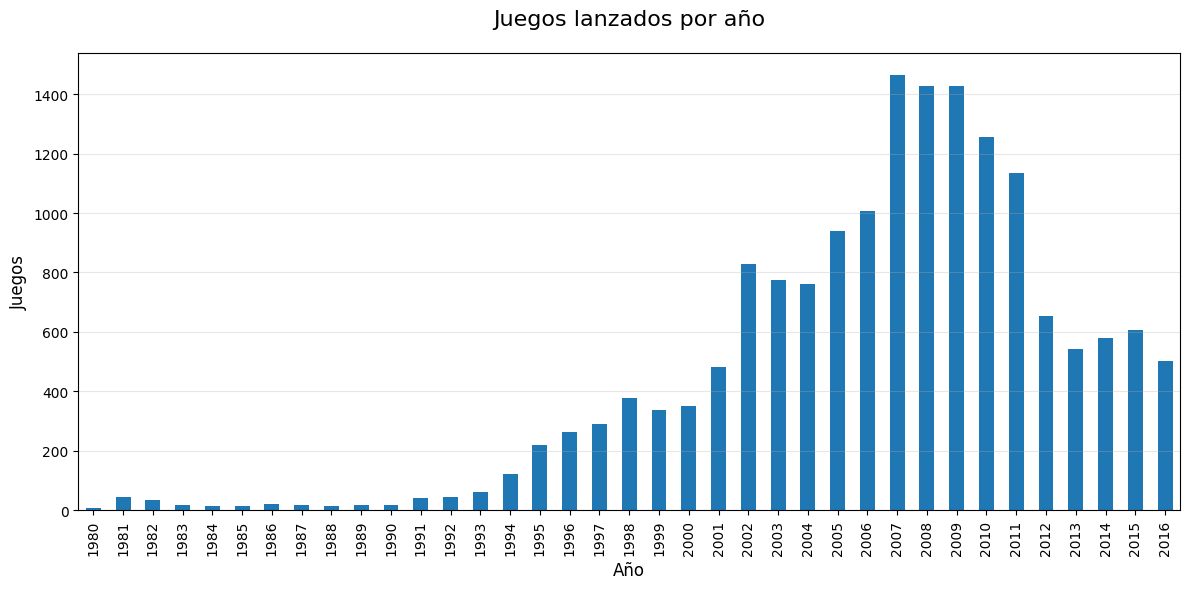

El año de mejores ventas ha sido 2007, con un total de 703.67, se han obtenido en promedio por ventas 240.89972972972976 por año.


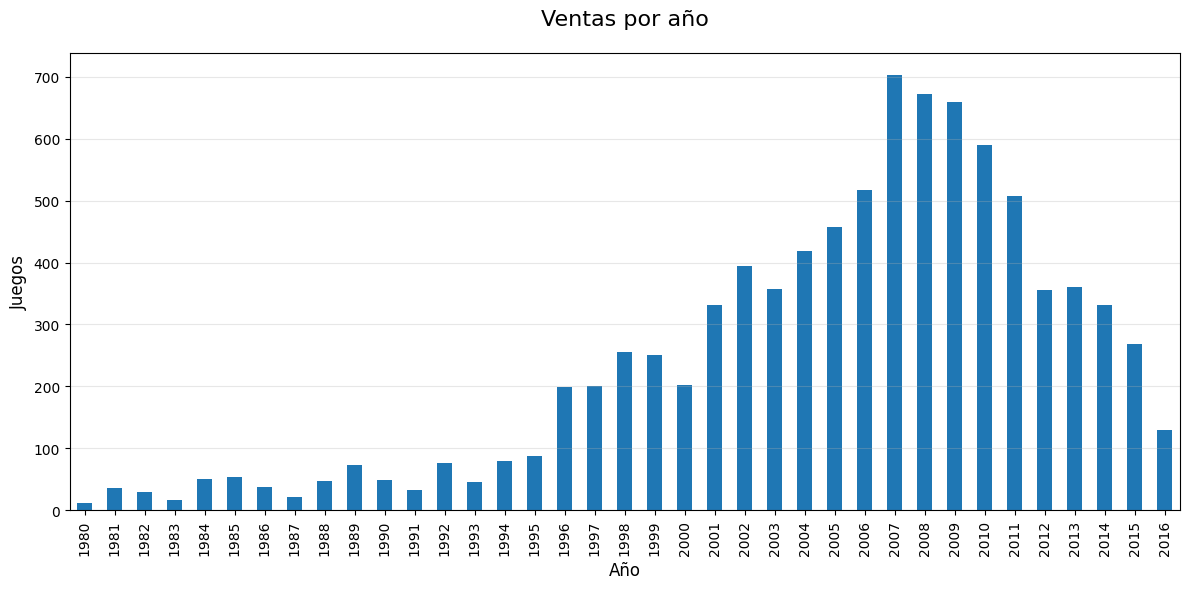

In [92]:
#------------análisis años vs juegos lanzados----------
year_group_count = df.groupby('year_of_release')['name'].count()
no_games = year_group_count.max()
año = year_group_count.idxmax()
mean_games = year_group_count.mean()
print(f'El año en el que mas juegos han sido lanzados es: {año}, con un total de {no_games} juegos lanzados, en promedio se han lanzado {mean_games} por año.')

# --- GRÁFICA de años vs juegos lanzados---
plt.figure(figsize=(12, 6))

year_group_count.plot(kind = 'bar')

plt.title('Juegos lanzados por año', fontsize=16, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Juegos', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)


# Ajustar diseño
plt.tight_layout()
plt.show()

#----------Grupo años vs ventas-----------------
year_sales = df.groupby('year_of_release')['total_sales'].sum()

sales = year_sales.max()
año = year_sales.idxmax()
mean_sales = year_sales.mean()
print(f'El año de mejores ventas ha sido {año}, con un total de {sales}, se han obtenido en promedio por ventas {mean_sales} por año.')

# --- GRÁFICA de años vs ventas---
plt.figure(figsize=(12, 6))

year_sales.plot(kind = 'bar')

plt.title('Ventas por año', fontsize=16, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Juegos', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)


# Ajustar diseño
plt.tight_layout()
plt.show()


En este analisis podemos ver que el crecimiento de las ventas de videojuegos ha sido a partir del año 2005 y despues del año 2007 ha habido una tendencia bajista, tanto en la producción de videojuegos como en las ventas.

### Las mejores plataformas

Hagamos un espacio para indagar cuáles han sido las mejores plataformas en las que se han desarollado más juegos y que han sido las más rentables.

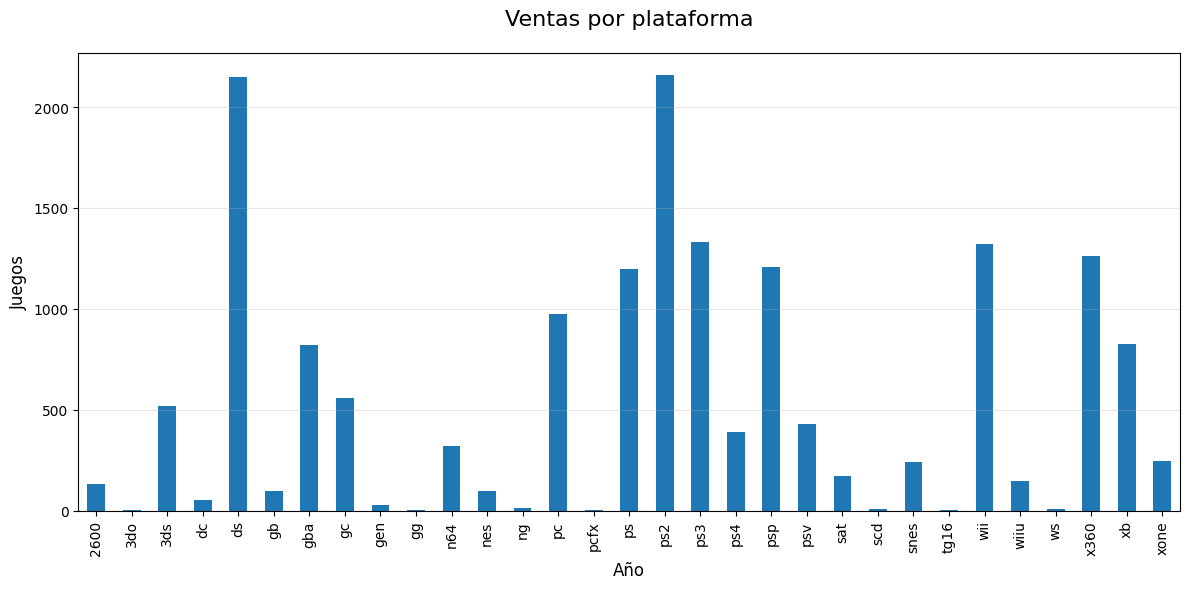

In [93]:
#------------grupo de plataformas vs ventas (La mejor plataforma)-----------------------

grupo_plataforma_ventas = df.groupby('platform')['name'].count()

# --------- GRÁFICA -----------
plt.figure(figsize=(12, 6))

grupo_plataforma_ventas.plot(kind = 'bar')

plt.title('Ventas por plataforma', fontsize=16, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Juegos', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)


# Ajustar diseño
plt.tight_layout()
plt.show()



Teniendo una representación gráfica de las ventas totales, vemos que los ganadores son ds y ps2, exploremos más a detalle estas plataformas

In [106]:
print(year_sales)

year_of_release
1980     11.38
1981     35.68
1982     28.88
1983     16.80
1984     50.35
1985     53.95
1986     37.08
1987     21.70
1988     47.21
1989     73.45
1990     49.37
1991     32.23
1992     76.16
1993     45.99
1994     79.23
1995     88.12
1996    199.15
1997    201.07
1998    256.31
1999    251.11
2000    201.66
2001    331.46
2002    394.97
2003    357.54
2004    418.68
2005    457.82
2006    517.71
2007    703.67
2008    671.50
2009    658.82
2010    590.13
2011    507.58
2012    355.84
2013    361.24
2014    331.53
2015    267.98
2016    129.94
Name: total_sales, dtype: float64


Comparando ambos juegos, despues de el año 2005 el ds reemplaza a ps2 ganando mercado y luego sostituyendo por completo a la plataforma.

Paso 3. Analiza los datos

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 

Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

Paso 6. Escribe una conclusión general

Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y agrega encabezados.

Descripción de datos
— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

¿Cómo será evaluado mi proyecto?
Lee atentamente estos criterios de evaluación de proyectos antes de empezar a trabajar.

Esto es lo que buscan los revisores de proyecto cuando evalúan tu proyecto:

¿Cómo describirías los problemas identificados en los datos?
¿Cómo se prepara un dataset para el análisis?
¿Cómo creas gráficos de distribución y cómo los explicas?
¿Cómo calculas la desviación estándar y varianza?
¿Formulas las hipótesis alternativas y nulas?
¿Qué métodos aplicas a la hora de probarlos?
¿Explicas los resultados de tus pruebas de hipótesis?
¿Sigues la estructura del proyecto y mantienes tu código ordenado y comprensible?
¿A qué conclusiones llegas?
¿Has dejado comentarios claros y relevantes en cada paso?
Todo lo que necesitas para completar este proyecto se encuentra en las hojas informativas y los resúmenes de los capítulos anteriores.

¡Buena suerte!